In [1]:
import os
import re
import csv
import pandas as pd
import math as m
import numpy as np
import linecache
import string
import matplotlib.pylab as plt
import datetime
import random
import seaborn as sns
from tqdm import tqdm
import matplotlib
from collections import defaultdict

In [2]:
#directory
os.chdir('C:\\Users\\Skynet\\______ADM______\\HW5')
path = os.getcwd()
path

'C:\\Users\\Skynet\\______ADM______\\HW5'

## Data

In [3]:
df = pd.read_csv('wikigraph_reduced.csv')

In [4]:
df = df['\t0\t1'].str.split('\t', n=2, expand = True)
df.rename(columns={0: "edge",1: "source", 2: "target"}, inplace = True)
df.head(10)

,edge,source,target
0,796,95,1185516
1,909,108,1059989
2,910,108,1062426
3,911,108,1161925
4,1141,134,541222
5,1143,134,1061485
6,1146,134,1163610
7,1147,134,1163783
8,1309,153,744272
9,1311,153,1064807


In [5]:
pages = pd.read_csv('wiki-topcats-page-names.txt', header = None, names = ['page'])
pages = pages['page'].str.split(' ', n=1, expand = True)
pages.drop(0,axis=1, inplace = True)
pages.rename(columns={1:'pageName'},inplace=True)

In [6]:
pages.head()

,pageName
0,Chiasmal syndrome
1,Kleroterion
2,Pinakion
3,LyndonHochschildSerre spectral sequence
4,Zariski's main theorem


In [7]:
file = open("wiki-topcats-categories.txt", "r")
contents = file.read()
contents = contents.split("\n")
file.close()

## Initial Anlysis

In [8]:
#dictionary that has for keys the category and for value the list of pages in that category
dictionary_cat = {}

for i in tqdm(range(len(contents))):
    
    temp = contents[i].split(";")    
    if len(temp)>1:
    
        key = temp[0]
        key = key[9::]
        key

        list_page_frcat = temp[1].split(" ")
        list_page_frcat = list_page_frcat[1::]
        list_page_frcat

        dictionary_cat[key] = list_page_frcat

100%|█████████████████████████████████████████████████████████████████████████| 17365/17365 [00:00<00:00, 33921.93it/s]


In [9]:
#dictionary that associates to each page, the list of categories that is in
inverted_link = {}

for i in tqdm(range (len(contents))):
    
    temp = contents[i].split(";")  
    if len(temp)>1:
        key = temp[0]
        key = key[9::]
        key

        list_page_frcat = temp[1].split(" ")
        list_page_frcat = list_page_frcat[1::]
        list_page_frcat

        for x in list_page_frcat: 

            if x not in inverted_link.keys():             
                inverted_link[x] = []
                inverted_link[x].append(key)

            else:
                 inverted_link[x].append(key)

100%|██████████████████████████████████████████████████████████████████████████| 17365/17365 [00:05<00:00, 3082.24it/s]


In [10]:
#list that has all the pages that have are associated to more than 1 category
key_list = []
for key in inverted_link.keys():
    if len(inverted_link[key])>1:
        key_list.append(key)
print(f'number of pages that appear in more than one category: {len(key_list)}')

number of pages that appear in more than one category: 977014


In [52]:
inverted_link["153"]

['Upcoming_films',
 'English-language_films',
 'American_films',
 'African_American_films']

In [12]:
#dictionary that shows the distribution of the pages in each category
len_list = {}

for key in key_list:     
    lenght = len(inverted_link[key]) 
    
    if lenght not in len_list.keys():             
                len_list[lenght] = 1
    else:
        len_list[lenght] += 1

In [13]:
len_list

{2: 349893,
 4: 132517,
 3: 211504,
 6: 60167,
 7: 40023,
 12: 6738,
 9: 18802,
 11: 9379,
 13: 4912,
 5: 89085,
 8: 27118,
 14: 3626,
 10: 13315,
 16: 1967,
 18: 1051,
 19: 724,
 15: 2635,
 22: 277,
 21: 392,
 17: 1471,
 27: 63,
 20: 577,
 23: 250,
 24: 156,
 26: 97,
 25: 109,
 30: 23,
 32: 11,
 28: 44,
 29: 35,
 36: 3,
 31: 23,
 38: 3,
 33: 8,
 34: 9,
 35: 3,
 134: 1,
 37: 1,
 39: 1,
 48: 1}

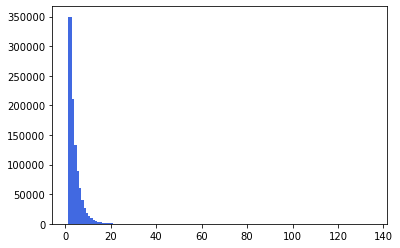

In [19]:
plt.bar(len_list.keys(), len_list.values(), width = 2.0, color='royalblue')
plt.xlim = (0, 1.05*max(len_list.keys()))

For every page in the inverted index (key) I uniformly choose at random the category in which belongs and I create a new dictionary where the categories are the keys and the pages in each category are the values.

In [20]:
#final dictionary where the pages that appear in multiple categories are assigned to only one uniformly at random
final_category_dict = dict.fromkeys(dictionary_cat.keys())

for key,value in tqdm(inverted_link.items()):
    category = str(*np.random.choice(value, size=1, replace=False, p= None))
    if final_category_dict[category] == None:
        final_category_dict[category] = [key]
    else:
        final_category_dict[category].append(key)    

100%|█████████████████████████████████████████████████████████████████████| 1791490/1791490 [00:54<00:00, 32982.64it/s]


#### Trial to see if the above operation worked

In [21]:
#dictionary that associates to each page, the list of categories that it is in
inverted_link2 = {}

for key,value in tqdm(final_category_dict.items()):
    if value != None:

        for elem in value: 
            if elem not in inverted_link2.keys():             
                inverted_link2[elem] = []
                inverted_link2[elem].append(key)

            else:
                inverted_link2[elem].append(key)

100%|██████████████████████████████████████████████████████████████████████████| 17364/17364 [00:03<00:00, 5444.93it/s]


In [22]:
key_list = []
for key in inverted_link2.keys():
    if len(inverted_link2[key])>1:
        key_list.append(key)
key_list

[]

This proves that now there are no pages that appear in multiple categories

In [ ]:
len(final_category_dict)


#### filtering nodes based on reduced wikigraph

In [87]:
df["source"][0]

'95'

In [88]:
len(df)

483094

In [109]:
#mantaining only nodes which appear in reduced wikigraph in "source" and "target" columns

filtered_inverted_link = {}

columns = ["source", "target"]
    
for column in columns:
    for x in tqdm(range(len(df))):
        page = df[column][x]
        
        if page in inverted_link.keys():
            filtered_inverted_link[page] = inverted_link[page]
            
            

100%|███████████████████████████████████████████████████████████████████████| 483094/483094 [00:09<00:00, 52682.13it/s]


In [110]:
#converting inverted index in dictionary category index

filtered_category_dict = {}

for key, value in filtered_inverted_link.items():
    
    x = value[0]
    if x not in filtered_category_dict.keys():
        
        filtered_category_dict[x] = []
        filtered_category_dict[x].append(key)
    
    else:
         filtered_category_dict[x].append(key)
        
        
    

In [112]:
len(filtered_category_dict)

2321

In [105]:
filtered_category_dict

{'Debut_albums': ['95',
  '108',
  '31725',
  '31726',
  '31728',
  '40526',
  '70561',
  '71208',
  '72473',
  '94544',
  '109388',
  '109473',
  '109494',
  '109547',
  '111102',
  '114126',
  '114129',
  '139927',
  '140088',
  '140134',
  '140147',
  '140308',
  '140353',
  '140632',
  '140732',
  '140829',
  '140952',
  '141033',
  '141072',
  '141255',
  '141309',
  '141310',
  '141318',
  '141421',
  '141809',
  '141835',
  '141920',
  '141988',
  '142120',
  '142244',
  '142249',
  '142253',
  '142339',
  '142381',
  '142492',
  '142592',
  '142603',
  '142706',
  '142728',
  '142746',
  '142870',
  '142949',
  '142977',
  '143282',
  '144132',
  '144247',
  '144383',
  '144763',
  '145322',
  '145421',
  '145515',
  '145538',
  '145724',
  '145873',
  '145943',
  '145964',
  '145983',
  '146133',
  '146144',
  '146151',
  '146319',
  '146325',
  '146645',
  '147435',
  '150451',
  '150551',
  '150617',
  '150628',
  '150758',
  '150897',
  '150913',
  '150923',
  '151240',
  '

### RQ1. Build the graph G=(V, E)
Provide its basic information:

- Is the graph directed?
- How many articles are we considering?
- How many hyperlinks between pages exist?
- Compute the average number of links in an arbitrary page. What is the graph density? Do you believe that the graph is dense or sparse? Is the graph dense?
- Visualize the nodes' degree distribution

### RQ2. Function 1

Define a function that takes in input:

- A page *v*
- A number of clicks *d*

and returns the set of all pages that a user can reach within *d* clicks.

### RQ3. Function 2

Define a function that takes in input:

- A category *C*
- A set of pages in *C*, *p = {p1, ..., pn}*

and returns the minimum number of clicks required to reach all pages in *p*, starting from the page *v*, corresponding to the most central article, according to the *in-degree* centrality, in *C*.

### RQ4. Induced Subgraph

Given in input two categories: C1 and C2, we get the subgraph induced by all the articles in the two categories.

- Let *v* and *u* two arbitrary pages in the subgraph. What is the minimum set of hyperlinks one can remove to disconnect *u* and *v*?

### RQ5. Function 3

Write a function that, given an arbitrary category C0 as input, returns the list of remaning categories sorted by their distance from C0. In particular, the distance between two categories is defined as  $distance(C0, Ci) = median(ShortestPath(C0, Ci))$ 

Where $ShortestPath(C0, Ci)$ is the set of shortest paths from each pair of nodes in the two categories.

### RQ6. Function 4

Write a function that sorts the categories in the graph according to their PageRank (PR). For this task you need to model the network of categories such that you can apply the PR algorithm